# Dataset agrupado weather ETO

Librerias

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  

import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#Modelos
# import sklearn as sk

#Resultados
# import shap

from malbecs.preprocess import eto

Lectura

In [4]:
path = '../../data/raw/DATOS_ETO.txt'

eto_data = eto.load_eto_dataset(path)


In [5]:
eto_data = eto.add_year_and_month(eto_data)

In [6]:
cols_ids = ['ID_ESTACION','year','month']

cols_sum = [
        'PrecipAmountLocalDaytimeAvg','PrecipAmountLocalNighttimeAvg',
        'SnowAmountLocalDaytimeAvg','SnowAmountLocalNighttimeAvg'
]

cols_mean = [
        'GustLocalDayAvg', 'MSLPLocalDayAvg', 'RelativeHumidityLocalDayAvg',
        'UVIndexLocalDayAvg', 'VisibilityLocalDayAvg', 'WindSpeedLocalDayAvg',
        'TemperatureLocalAfternoonAvg','TemperatureLocalOvernightAvg'
]

eto_month = eto.get_monthly_datat(
        eto_data, 
        cols_mean,
        cols_sum,
        cols_ids
)

In [7]:
eto_month = eto.filter_relevant_months(eto_month, months=[1,2,3,4,5,6])



In [8]:
eto_month = eto.fillna_by_group(
    eto_month,
    cols=['MSLPLocalDayAvg'], 
    group=['ID_ESTACION','month']
)



In [ ]:
df_month = eto.fillna_by_value(df_month, cols = ['GustLocalDayAvg'], value=0)



In [9]:
eto_pivot = eto.pivot_monthly_data(eto_month)


In [10]:

eto_pivot = eto.fillna_by_group(
    eto_pivot, 
    cols=eto_pivot.columns, 
    group=['ID_ESTACION']
)

In [11]:
eto_pivot

,year,ID_ESTACION,GustLocalDayAvgMonth1,GustLocalDayAvgMonth2,GustLocalDayAvgMonth3,GustLocalDayAvgMonth4,GustLocalDayAvgMonth5,GustLocalDayAvgMonth6,MSLPLocalDayAvgMonth1,MSLPLocalDayAvgMonth2,MSLPLocalDayAvgMonth3,MSLPLocalDayAvgMonth4,MSLPLocalDayAvgMonth5,MSLPLocalDayAvgMonth6,RelativeHumidityLocalDayAvgMonth1,RelativeHumidityLocalDayAvgMonth2,RelativeHumidityLocalDayAvgMonth3,RelativeHumidityLocalDayAvgMonth4,RelativeHumidityLocalDayAvgMonth5,RelativeHumidityLocalDayAvgMonth6,UVIndexLocalDayAvgMonth1,UVIndexLocalDayAvgMonth2,UVIndexLocalDayAvgMonth3,UVIndexLocalDayAvgMonth4,UVIndexLocalDayAvgMonth5,UVIndexLocalDayAvgMonth6,VisibilityLocalDayAvgMonth1,VisibilityLocalDayAvgMonth2,VisibilityLocalDayAvgMonth3,VisibilityLocalDayAvgMonth4,VisibilityLocalDayAvgMonth5,VisibilityLocalDayAvgMonth6,WindSpeedLocalDayAvgMonth1,WindSpeedLocalDayAvgMonth2,WindSpeedLocalDayAvgMonth3,WindSpeedLocalDayAvgMonth4,WindSpeedLocalDayAvgMonth5,WindSpeedLocalDayAvgMonth6,TemperatureLocalAfternoonAvgMonth1,TemperatureLocalAfternoonAvgMonth2,TemperatureLocalAfternoonAvgMonth3,TemperatureLocalAfternoonAvgMonth4,TemperatureLocalAfternoonAvgMonth5,TemperatureLocalAfternoonAvgMonth6,TemperatureLocalOvernightAvgMonth1,TemperatureLocalOvernightAvgMonth2,TemperatureLocalOvernightAvgMonth3,TemperatureLocalOvernightAvgMonth4,TemperatureLocalOvernightAvgMonth5,TemperatureLocalOvernightAvgMonth6,TotalPrecipAmountLocalDaytimeMonth1,TotalPrecipAmountLocalDaytimeMonth2,TotalPrecipAmountLocalDaytimeMonth3,TotalPrecipAmountLocalDaytimeMonth4,TotalPrecipAmountLocalDaytimeMonth5,TotalPrecipAmountLocalDaytimeMonth6,TotalPrecipAmountLocalNighttimeMonth1,TotalPrecipAmountLocalNighttimeMonth2,TotalPrecipAmountLocalNighttimeMonth3,TotalPrecipAmountLocalNighttimeMonth4,TotalPrecipAmountLocalNighttimeMonth5,TotalPrecipAmountLocalNighttimeMonth6,TotalSnowAmountLocalDaytimeMonth1,TotalSnowAmountLocalDaytimeMonth2,TotalSnowAmountLocalDaytimeMonth3,TotalSnowAmountLocalDaytimeMonth4,TotalSnowAmountLocalDaytimeMonth5,TotalSnowAmountLocalDaytimeMonth6,TotalSnowAmountLocalNighttimeMonth1,TotalSnowAmountLocalNighttimeMonth2,TotalSnowAmountLocalNighttimeMonth3,TotalSnowAmountLocalNighttimeMonth4,TotalSnowAmountLocalNighttimeMonth5,TotalSnowAmountLocalNighttimeMonth6
0,2015,0,8.73,8.81,8.41,8.09,8.11,5.90,102201.83,102146.62,101755.81,101428.21,101617.30,101532.45,67.64,66.56,68.41,70.65,61.86,42.60,0.40,0.62,1.04,1.54,2.13,1.45,12703.95,12566.77,12205.02,12427.89,13459.72,16093.00,2.80,2.68,3.10,2.66,2.34,3.35,285.20,287.35,287.95,289.94,295.82,308.00,279.00,280.16,281.13,283.18,286.70,292.50,40.80,12.51,55.03,45.26,20.23,0.00,33.60,9.94,41.66,54.51,11.83,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00
1,2015,1,9.46,8.96,8.78,8.50,8.58,6.25,102234.06,102167.03,101762.08,101431.50,101629.07,101553.19,72.75,69.21,69.56,70.14,59.82,36.65,0.40,0.63,1.04,1.55,2.14,1.60,12317.72,12307.27,12143.72,12397.98,13268.26,16093.00,3.81,3.63,4.09,3.53,3.13,3.85,283.08,285.76,286.44,288.86,295.13,307.50,276.36,277.81,278.96,281.25,285.00,293.50,25.54,11.31,42.86,44.23,23.66,0.00,16.63,10.11,35.83,51.94,24.51,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00
2,2015,2,9.01,8.94,8.49,8.27,8.05,8.04,102230.35,102165.75,101763.44,101439.95,101615.43,101532.84,69.86,66.95,67.13,68.15,59.89,41.05,0.42,0.64,1.07,1.58,2.17,1.50,12708.40,12722.14,12670.05,12872.93,13692.44,16093.00,2.97,2.84,3.23,2.88,2.62,3.35,285.73,288.31,289.03,291.16,296.84,307.85,277.95,279.45,280.67,282.91,286.22,292.60,20.74,5.14,43.03,38.91,14.06,0.00,19.20,3.43,31.20,46.11,17.66,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2015,3,9.29,9.06,8.66,8.48,8.16,6.30,102213.03,102157.90,101758.68,101429.61,101625.83,101547.07,71.02,69.21,70.03,71.44,62.10,38.90,0.40,0.62,1.04,1.54,2.14,1.50,12500.75,12391.16,12075.28,12384.46,13293.40,16093.00,3.61,3.43,3.89,3.33,2.91,3.65,284.27,286.65,287.29,289.49,295.63,308.00,277.67,279.01,280.10,282.25,285.84,293.00,31.54,8.74,44.74,35.49,16.97,0.

In [12]:
eto_pivot.to_csv('../../data/processed/eto_pro.csv', index=False)

In [15]:
# eto.preprocess_eto_dataset(path)

Resumen

In [7]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')
print(f'\nCantidad de duplicados: {df.duplicated().sum()}\n')
print('-------- Tipos de columnas --------')
print(df.dtypes)
print('\n -------- Cantidad de nulos --------')
df.isna().sum()

Número de filas: 51180, Número de columnas:275

Cantidad de duplicados: 0

-------- Tipos de columnas --------
date                            int64
DewpointLocalAfternoonAvg     float64
DewpointLocalAfternoonMax     float64
DewpointLocalAfternoonMin     float64
DewpointLocalDayAvg           float64
                               ...   
WindSpeedLocalNighttimeMin    float64
WindSpeedLocalOvernightAvg    float64
WindSpeedLocalOvernightMax    float64
WindSpeedLocalOvernightMin    float64
ID_ESTACION                     int64
Length: 275, dtype: object

 -------- Cantidad de nulos --------


date                          0
DewpointLocalAfternoonAvg     0
DewpointLocalAfternoonMax     0
DewpointLocalAfternoonMin     0
DewpointLocalDayAvg           0
                             ..
WindSpeedLocalNighttimeMin    0
WindSpeedLocalOvernightAvg    0
WindSpeedLocalOvernightMax    0
WindSpeedLocalOvernightMin    0
ID_ESTACION                   0
Length: 275, dtype: int64

Nulos

In [8]:
nulos = pd.DataFrame(df.isna().sum(),columns=['nulls'])
nulos[nulos.nulls>0].sort_values('nulls',ascending=False)
nulos.sort_values('nulls',ascending=False).T

,GustLocalOvernightMin,GustLocalOvernightMax,GustLocalOvernightAvg,GustLocalMorningMin,GustLocalMorningMax,GustLocalMorningAvg,GustLocalEveningMin,GustLocalEveningMax,GustLocalEveningAvg,GustLocalNighttimeMin,GustLocalNighttimeMax,GustLocalNighttimeAvg,GustLocalAfternoonMin,GustLocalAfternoonMax,GustLocalAfternoonAvg,GustLocalDaytimeMin,GustLocalDaytimeAvg,GustLocalDaytimeMax,GustLocalDayMin,GustLocalDayAvg,GustLocalDayMax,GlobalHorizontalIrradianceLocalMorningAvg,GlobalHorizontalIrradianceLocalEveningMin,EvapotranspirationLocalMorningMin,EvapotranspirationLocalMorningMax,EvapotranspirationLocalMorningAvg,EvapotranspirationLocalEveningMin,EvapotranspirationLocalEveningMax,EvapotranspirationLocalEveningAvg,GlobalHorizontalIrradianceLocalEveningMax,GlobalHorizontalIrradianceLocalMorningMax,GlobalHorizontalIrradianceLocalMorningMin,GlobalHorizontalIrradianceLocalEveningAvg,GlobalHorizontalIrradianceLocalDaytimeAvg,GlobalHorizontalIrradianceLocalDayMin,GlobalHorizontalIrradianceLocalDayMax,GlobalHorizontalIrradianceLocalDayAvg,GlobalHorizontalIrradianceLocalAfternoonMin,GlobalHorizontalIrradianceLocalDaytimeMin,GlobalHorizontalIrradianceLocalOvernightMax,GlobalHorizontalIrradianceLocalNighttimeAvg,GlobalHorizontalIrradianceLocalNighttimeMax,GlobalHorizontalIrradianceLocalNighttimeMin,GlobalHorizontalIrradianceLocalOvernightAvg,GlobalHorizontalIrradianceLocalAfternoonAvg,GlobalHorizontalIrradianceLocalOvernightMin,GlobalHorizontalIrradianceLocalAfternoonMax,GlobalHorizontalIrradianceLocalDaytimeMax,EvapotranspirationLocalAfternoonAvg,EvapotranspirationLocalDaytimeAvg,EvapotranspirationLocalOvernightAvg,EvapotranspirationLocalNighttimeMin,EvapotranspirationLocalNighttimeMax,EvapotranspirationLocalNighttimeAvg,EvapotranspirationLocalDaytimeMin,EvapotranspirationLocalDaytimeMax,EvapotranspirationLocalDayMin,EvapotranspirationLocalOvernightMin,EvapotranspirationLocalDayMax,EvapotranspirationLocalDayAvg,EvapotranspirationLocalAfternoonMin,EvapotranspirationLocalAfternoonMax,EvapotranspirationLocalOvernightMax,MSLPLocalMorningAvg,MSLPLocalMorningMax,MSLPLocalMorningMin,MSLPLocalAfternoonMax,MSLPLocalDayMax,MSLPLocalOvernightMax,MSLPLocalOvernightAvg,MSLPLocalNighttimeAvg,MSLPLocalNighttimeMin,MSLPLocalNighttimeMax,MSLPLocalAfternoonAvg,MSLPLocalAfternoonMin,MSLPLocalDayAvg,MSLPLocalOvernightMin,MSLPLocalDayMin,MSLPLocalDaytimeMax,MSLPLocalDaytimeMin,MSLPLocalEveningAvg,MSLPLocalEveningMax,MSLPLocalEveningMin,MSLPLocalDaytimeAvg,WindSpeedLocalMorningMin,PrecipAmountLocalMorningMax,WindSpeedLocalMorningAvg,WindSpeedLocalMorningMax,SnowAmountLocalMorningMin,PrecipAmountLocalMorningAvg,SnowAmountLocalMorningAvg,SnowAmountLocalMorningMax,DewpointLocalMorningAvg,TemperatureLocalMorningAvg,PrecipAmountLocalMorningMin,FeelsLikeLocalMorningMax,UVIndexLocalMorningMax,RelativeHumidityLocalMorningMax,VisibilityLocalMorningAvg,FeelsLikeLocalMorningMin,DewpointLocalMorningMax,FeelsLikeLocalMorningAvg,VisibilityLocalMorningMax,VisibilityLocalMorningMin,RelativeHumidityLocalMorningMin,UVIndexLocalMorningAvg,UVIndexLocalMorningMin,TemperatureLocalMorningMin,TemperatureLocalMorningMax,DewpointLocalMorningMin,RelativeHumidityLocalMorningAvg,UVIndexLocalEveningMin,UVIndexLocalEveningAvg,UVIndexLocalEveningMax,UVIndexLocalDaytimeMin,UVIndexLocalDaytimeMax,UVIndexLocalDaytimeAvg,UVIndexLocalDayMin,UVIndexLocalDayMax,UVIndexLocalDayAvg,UVIndexLocalAfternoonMin,TemperatureLocalNighttimeAvg,SnowAmountLocalOvernightMin,TemperatureLocalAfternoonAvg,TemperatureLocalNighttimeMin,TemperatureLocalOvernightAvg,TemperatureLocalOvernightMax,TemperatureLocalOvernightMin,UVIndexLocalAfternoonAvg,TemperatureLocalEveningMin,TemperatureLocalEveningMax,TemperatureLocalEveningAvg,TemperatureLocalDaytimeMin,TemperatureLocalDaytimeMax,TemperatureLocalDaytimeAvg,TemperatureLocalDayMin,TemperatureLocalDayMax,UVIndexLocalAfternoonMax,TemperatureLocalNighttimeMax,TemperatureLocalAfternoonMin,TemperatureLocalAfternoonMax,TemperatureLocalDayAvg,date,UVIndexLocalNighttimeAvg,UVIndexLoca

Nulos: 

- +15000 para MSLP, Evapo, GlobalHorizontal, Gust

Fecha

In [16]:
df['date']  = pd.to_datetime(
    df['date'].astype(str).apply(lambda x: "{}/{}/{}".format(x[4:6],x[6:], x[0:4]))
)

Año-Mes

In [38]:
df['mes']= df.date.dt.month_name()
df['mes_num']= df.date.dt.month
df['año']= df.date.dt.year.astype("int32")

Para lluvia y nieve, que son volumenes Avg, multiplicamos por 12 para obtener el total de volumen cada 12 hs

In [22]:
df['lluvia_daytime_avg'] = df['PrecipAmountLocalDaytimeAvg'] * 12
df['lluvia_night_avg']   = df['PrecipAmountLocalNighttimeAvg'] * 12
df['nieve_daytime_Avg']  = df['SnowAmountLocalDaytimeAvg']   * 12
df['nieve_night_Avg']    = df['SnowAmountLocalNighttimeAvg']  * 12

## Agrupacion

Hay **13 variables**, cada una con 21 combinaciones posibles.

- Período: Afternoon, Day, Daytime, Evening, Morning, Nighttime, Overnight (7)
- Avg, Min, Max (3)

3*7 = 21

**Para el join**

- Elegir una de las 3 métricas para cada una de las 13 variables.
- Elegir una de los 7 períodos para cada variable (1).
- Resulta en 13 variables, con una columna para cada mes, es decir 13 * 1 * 12 = **156 columnas a agregar**

**Join**

- **On**: Año=campaña, id_estacion=id_estacion
- **Values**:  156 columnas

Hace falta agrupar por año, mes y estacion. En este caso calculamos la media unicamente.

In [23]:
df.columns[1:-8]

Index(['DewpointLocalAfternoonAvg', 'DewpointLocalAfternoonMax',
       'DewpointLocalAfternoonMin', 'DewpointLocalDayAvg',
       'DewpointLocalDayMax', 'DewpointLocalDayMin', 'DewpointLocalDaytimeAvg',
       'DewpointLocalDaytimeMax', 'DewpointLocalDaytimeMin',
       'DewpointLocalEveningAvg',
       ...
       'WindSpeedLocalEveningMin', 'WindSpeedLocalMorningAvg',
       'WindSpeedLocalMorningMax', 'WindSpeedLocalMorningMin',
       'WindSpeedLocalNighttimeAvg', 'WindSpeedLocalNighttimeMax',
       'WindSpeedLocalNighttimeMin', 'WindSpeedLocalOvernightAvg',
       'WindSpeedLocalOvernightMax', 'WindSpeedLocalOvernightMin'],
      dtype='object', length=273)

In [83]:
df['month'] =  df.date.dt.month
df['year'] = df.date.dt.year.astype("int32")

cols_ids = ['ID_ESTACION','year','month']

cols_sum = [
    'PrecipAmountLocalDaytimeAvg','PrecipAmountLocalNighttimeAvg',
    'SnowAmountLocalDaytimeAvg','SnowAmountLocalNighttimeAvg'
]

cols_mean = [
    'GustLocalDayAvg', 'MSLPLocalDayAvg', 'RelativeHumidityLocalDayAvg',
    'UVIndexLocalDayAvg', 'VisibilityLocalDayAvg', 'WindSpeedLocalDayAvg',
    'TemperatureLocalAfternoonAvg','TemperatureLocalOvernightAvg'
]

In [100]:
def get_totals_by_daytime_and_nighttime(df, cols, rename=True):
    if rename:
        new_cols = [f"Total{c[:-3]}" for c in cols]
    else:
        new_cols = cols

    df[new_cols] = (df[cols]*12)    
    return df[new_cols]

def get_data_for_sum_group(df, cols_sum, cols_ids):
    df_sum = pd.concat([
        df[cols_ids],
        get_totals_by_daytime_and_nighttime(df, cols_sum)
    ], axis=1)
    return df_sum


def get_data_for_mean_group(df, cols_mean, cols_ids):
    df_mean = df[cols_ids+cols_mean]
    return df_mean


def get_monthly_datat(df, cols_mean, cols_sum, cols_ids):
    df_mean = get_data_for_mean_group(df, cols_mean, cols_ids)
    df_sum = get_data_for_sum_group(df, cols_sum, cols_ids)
    grouped_sum = df_sum.groupby(cols_ids).sum()
    grouped_mean = df_mean.groupby(cols_ids).mean()
    df_month = pd.concat([grouped_mean,grouped_sum],axis=1).reset_index()
    return df_month


def filter_relevant_months(df, months=[1,2,3,4,5,6]):
    return df[df['month'].isin(months)]

def fillna_by_group(df_month, cols=['MSLPLocalDayAvg'], group=['ID_ESTACION','month']):
    for col in cols:
        df_month[col] = df_month.groupby(group)[col].transform(lambda x: x.fillna(x.mean()))
    return df_month


def fillna_by_value(df_month, cols=['GustLocalDayAvg'] ):
    df_month[cols] = df_month[cols].fillna(0)
    return df_month


def flatten_pivot_columns(df_pivot):
    df_pivot.columns = [x +'Month'+ str(y) if y != '' else x for x,y in df_pivot.columns.to_flat_index()]
    return df_pivot

def pivot_monthly_data(df_month, index=['year','ID_ESTACION'], columns=['month']):

    values = df_month.drop(columns=index+columns).columns.tolist()
    df_pivot = df_month.pivot(index=index, columns=columns, values=values).reset_index()
    df_pivot = flatten_pivot_columns(df_pivot)
    return df_pivot


df_month = get_monthly_datat(df, cols_mean, cols_sum, cols_ids)

df_month = filter_relevant_months(df_month)

df_month = fillna_by_group(df_month)

df_month = fillna_by_value(df_month)

df_pivot = pivot_monthly_data(df_month)

df_pivot = fillna_by_group(df_pivot, cols=df_pivot.columns, group=['ID_ESTACION'])



0

In [64]:
# grouped_mean = df.groupby(ids)[cols_mean].mean()

In [87]:
# df_month = pd.concat([grouped_mean,grouped_sum],axis=1).reset_index()

In [78]:
#  select months
# df_grouped=df_grouped[df_grouped['mes_num'].isin(range(1,7))]
# df_month
def filter_relevant_months(df, months=[1,2,3,4,5,6]):
    return df[df['month'].isin(months)]

df_month = filter_relevant_months(df_month)


In [79]:
# fillnas
df_month['MSLPLocalDayAvg'] = df_month.groupby(['ID_ESTACION','month'])['MSLPLocalDayAvg'].transform(lambda x: x.fillna(x.mean()))

df_month['GustLocalDayAvg'] = df_month['GustLocalDayAvg'].fillna(0)

In [81]:
# pivot
# df_for_join = 

df_pivot = df_month.pivot(index=['year','ID_ESTACION'], columns='month', values=df_month.columns[3:]).reset_index()

# flatten column names
df_pivot.columns = [x +'_'+ str(y) if y != '' else x for x,y in df_pivot.columns.to_flat_index()]
df_pivot.head(10)

# fillnas 
for col in df_pivot.columns:
    df_pivot[col]  = df_pivot.groupby(['ID_ESTACION'])[col].transform(lambda x: x.fillna(x.mean()))
    

In [ ]:
df_pivot['campaña'] = df_pivot['año']%2000

df_pivot = df_pivot.drop(columns=['año'])

Fill NA para presion

In [27]:
# df_mensual['MSLPLocalDayAvg'] = df_mensual.groupby(['ID_ESTACION','mes_num'])['MSLPLocalDayAvg'].transform(lambda x: x.fillna(x.mean()))

Filtramos las columnas que sean diarias y avg

In [28]:
avg_cols_days = list(df_mensual.filter(like='DayAvg').columns)
new_cols = cols_sum
ids = ['ID_ESTACION','año','mes_num']
temperaturas = ['TemperatureLocalAfternoonAvg','TemperatureLocalOvernightAvg']
df_grouped = df_mensual[ids + avg_cols_days + new_cols + temperaturas]

cols_delete = ['TemperatureLocalDayAvg', 'PrecipAmountLocalDayAvg', 'SnowAmountLocalDayAvg','DewpointLocalDayAvg',
                'EvapotranspirationLocalDayAvg', 'FeelsLikeLocalDayAvg','GlobalHorizontalIrradianceLocalDayAvg']

df_grouped = df_grouped.drop(columns=cols_delete)

In [30]:
df_grouped.columns[3:]

Index(['GustLocalDayAvg', 'MSLPLocalDayAvg', 'RelativeHumidityLocalDayAvg',
       'UVIndexLocalDayAvg', 'VisibilityLocalDayAvg', 'WindSpeedLocalDayAvg',
       'lluvia_daytime_avg', 'lluvia_night_avg', 'nieve_daytime_Avg',
       'nieve_night_Avg', 'TemperatureLocalAfternoonAvg',
       'TemperatureLocalOvernightAvg'],
      dtype='object')

Shift para mas adelante

In [271]:
df_shifted = df_grouped.copy()
df_shifted[df_shifted.columns[3:]] = df_shifted.groupby(['ID_ESTACION','año'])[df_shifted.columns[3:]].shift(1)

In [272]:
df_shifted[df_shifted['ID_ESTACION']==1].head()

,ID_ESTACION,año,mes_num,GustLocalDayAvg,MSLPLocalDayAvg,RelativeHumidityLocalDayAvg,UVIndexLocalDayAvg,VisibilityLocalDayAvg,WindSpeedLocalDayAvg,lluvia_daytime_avg,lluvia_night_avg,nieve_daytime_Avg,nieve_night_Avg,TemperatureLocalAfternoonAvg,TemperatureLocalOvernightAvg
85,1,2015,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1,2015,7,6.25,NaN,36.65,1.60,16093.00,3.85,0.00,0.00,0.00,0.00,307.50,293.50
87,1,2015,8,5.61,NaN,57.92,2.46,15986.71,2.79,42.00,32.40,0.00,0.00,305.61,294.13
88,1,2015,9,5.52,NaN,68.84,2.13,15992.39,2.84,31.20,55.20,0.00,0.00,302.32,292.81
89,1,2015,10,5.75,NaN,75.80,1.53,15795.93,2.53,74.40,64.80,0.00,0.00,296.53,288.17


Fiiltramos meses de Marzo - Junio

In [319]:
df_grouped=df_grouped[df_grouped['mes_num'].isin([1,2,3,4,5,6])]

In [320]:
df_grouped.isna().sum()

ID_ESTACION                      0
año                              0
mes_num                          0
GustLocalDayAvg                 10
MSLPLocalDayAvg                  0
RelativeHumidityLocalDayAvg      0
UVIndexLocalDayAvg               0
VisibilityLocalDayAvg            0
WindSpeedLocalDayAvg             0
lluvia_daytime_avg               0
lluvia_night_avg                 0
nieve_daytime_Avg                0
nieve_night_Avg                  0
TemperatureLocalAfternoonAvg     0
TemperatureLocalOvernightAvg     0
dtype: int64

Fill NA para gust

In [321]:
df_grouped['GustLocalDayAvg']=df_grouped['GustLocalDayAvg'].fillna(0)

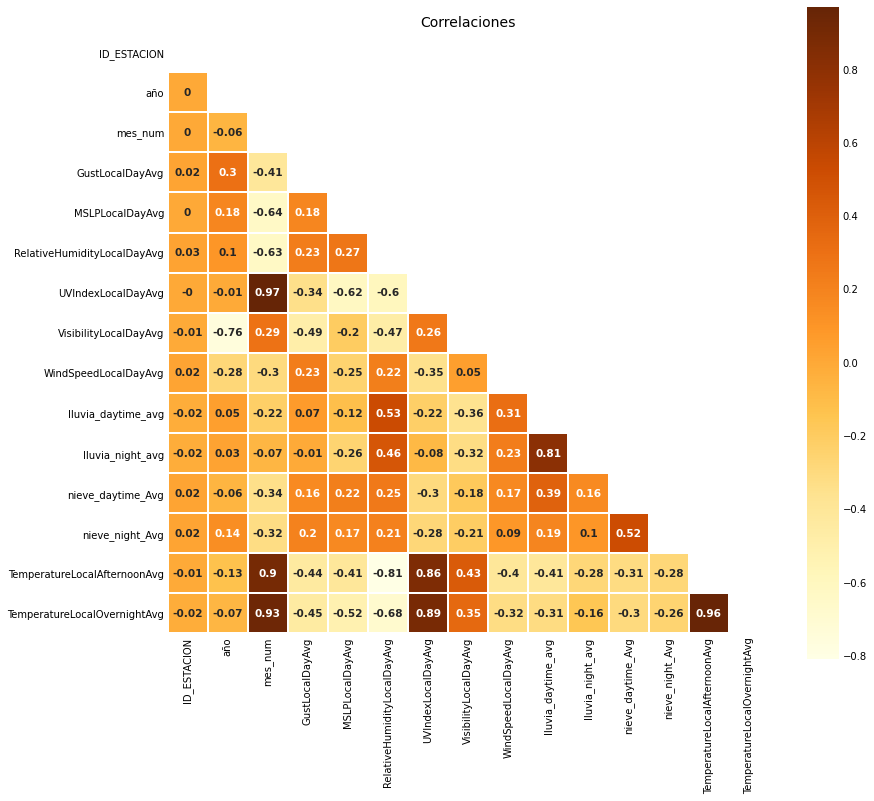

In [332]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(12,12))
    ax.set_facecolor('white')
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)

    plt.show()

num_cols =  df_grouped.select_dtypes([np.number]).columns

df_num = df_grouped[num_cols]

cor_mat = round(df_num.corr(),2)

Generate_heatmap_graph(cor_mat
                       ,chart_title = 'Correlaciones'
                       ,mask_uppertri = True)

Pivote pivote, llamamos join al dataset final

In [322]:
values_cols = list(df_grouped.filter(like='DayAvg').columns) + new_cols

df_for_join = df_grouped.pivot(index=['año','ID_ESTACION'], columns='mes_num', values=values_cols).reset_index()

In [323]:
df_for_join.head(10)

año ID_ESTACION GustLocalDayAvg                       \
mes_num                                 1   2   3   4   5    6   
0        2015           0             NaN NaN NaN NaN NaN 5.90   
1        2015           1             NaN NaN NaN NaN NaN 6.25   
2        2015           2             NaN NaN NaN NaN NaN 0.00   
3        2015           3             NaN NaN NaN NaN NaN 6.30   
4        2015           4             NaN NaN NaN NaN NaN 6.00   
5        2015           5             NaN NaN NaN NaN NaN 5.80   
6        2015           6             NaN NaN NaN NaN NaN 6.45   
7        2015           7             NaN NaN NaN NaN NaN 6.05   
8        2015           8             NaN NaN NaN NaN NaN 6.15   
9        2015           9             NaN NaN NaN NaN NaN 6.50   

        MSLPLocalDayAvg                           RelativeHumidityLocalDayAvg  \
mes_num               1   2   3   4   5         6                           1   
0                   NaN NaN NaN NaN NaN 101532.45                         NaN   
1                   NaN NaN NaN NaN NaN 101553.19                         NaN   
2                   NaN NaN NaN NaN NaN 101532.84                         NaN   
3                   NaN NaN NaN NaN NaN 101547.07                         NaN   
4                   NaN NaN NaN NaN NaN 101541.87                         NaN   
5                   NaN NaN NaN NaN NaN 101539.37                         NaN   
6                   NaN NaN NaN NaN NaN 101557.65                         NaN   
7                   NaN NaN NaN NaN NaN 101541.80                         NaN   
8                   NaN NaN NaN NaN NaN 101551.69                         NaN   
9                   NaN NaN NaN NaN NaN 101537.85                         NaN   

                              UVIndexLocalDayAvg                       \
mes_num   2   3   4   5     6                  1   2   3   4   5    6   
0       NaN NaN NaN NaN 42.60                NaN NaN NaN NaN NaN 1.45   
1       NaN NaN NaN NaN 36.65                NaN NaN NaN NaN NaN 1.60   
2       NaN NaN NaN NaN 41.05                NaN NaN NaN NaN NaN 1.50   
3       NaN NaN NaN NaN 38.90                NaN NaN NaN NaN NaN 1.50   
4       NaN NaN NaN NaN 37.10                NaN NaN NaN NaN NaN 1.50   
5       NaN NaN NaN NaN 43.20                NaN NaN NaN NaN NaN 1.45   
6       NaN NaN NaN NaN 36.45                NaN NaN NaN NaN NaN 1.45   
7       NaN NaN NaN NaN 41.30                NaN NaN NaN NaN NaN 1.50   
8       NaN NaN NaN NaN 37.35                NaN NaN NaN NaN NaN 1.50   
9       NaN NaN NaN NaN 43.35                NaN NaN NaN NaN NaN 1.45   

        VisibilityLocalDayAvg                          WindSpeedLocalDayAvg  \
mes_num                     1   2   3   4   5        6                    1   
0                         NaN NaN NaN NaN NaN 16093.00                  NaN   
1                         NaN NaN NaN NaN NaN 16093.00                  NaN   
2                         NaN NaN NaN NaN NaN 16093.00                  NaN   
3                         NaN NaN NaN NaN NaN 16093.00                  NaN   
4                         NaN NaN NaN NaN NaN 16093.00                  NaN   
5                         NaN NaN NaN NaN NaN 16093.00                  NaN   
6                         NaN NaN NaN NaN NaN 16093.00                  NaN   
7                         NaN NaN NaN NaN NaN 16093.00                  NaN   
8                         NaN NaN NaN NaN NaN 16093.00                  NaN   
9                         NaN NaN NaN NaN NaN 16093.00                  NaN   

                             lluvia_daytime_avg                       \
mes_num   2   3   4   5    6                  1   2   3   4   5    6   
0       NaN NaN NaN NaN 3.35                NaN NaN NaN NaN NaN 0.00   
1       NaN NaN NaN NaN 3.85                NaN NaN NaN NaN NaN 0.00   
2       NaN NaN NaN NaN 3.35                NaN NaN NaN NaN NaN 0.00   
3       NaN NaN NaN NaN 3.65                NaN NaN NaN Na

Arreglamos columnas y visualizamos

In [324]:
df_for_join.columns = [x +'_'+ str(y) if y != '' else x for x,y in df_for_join.columns.to_flat_index()]
df_for_join.head(10)

,año,ID_ESTACION,GustLocalDayAvg_1,GustLocalDayAvg_2,GustLocalDayAvg_3,GustLocalDayAvg_4,GustLocalDayAvg_5,GustLocalDayAvg_6,MSLPLocalDayAvg_1,MSLPLocalDayAvg_2,MSLPLocalDayAvg_3,MSLPLocalDayAvg_4,MSLPLocalDayAvg_5,MSLPLocalDayAvg_6,RelativeHumidityLocalDayAvg_1,RelativeHumidityLocalDayAvg_2,RelativeHumidityLocalDayAvg_3,RelativeHumidityLocalDayAvg_4,RelativeHumidityLocalDayAvg_5,RelativeHumidityLocalDayAvg_6,UVIndexLocalDayAvg_1,UVIndexLocalDayAvg_2,UVIndexLocalDayAvg_3,UVIndexLocalDayAvg_4,UVIndexLocalDayAvg_5,UVIndexLocalDayAvg_6,VisibilityLocalDayAvg_1,VisibilityLocalDayAvg_2,VisibilityLocalDayAvg_3,VisibilityLocalDayAvg_4,VisibilityLocalDayAvg_5,VisibilityLocalDayAvg_6,WindSpeedLocalDayAvg_1,WindSpeedLocalDayAvg_2,WindSpeedLocalDayAvg_3,WindSpeedLocalDayAvg_4,WindSpeedLocalDayAvg_5,WindSpeedLocalDayAvg_6,lluvia_daytime_avg_1,lluvia_daytime_avg_2,lluvia_daytime_avg_3,lluvia_daytime_avg_4,lluvia_daytime_avg_5,lluvia_daytime_avg_6,lluvia_night_avg_1,lluvia_night_avg_2,lluvia_night_avg_3,lluvia_night_avg_4,lluvia_night_avg_5,lluvia_night_avg_6,nieve_daytime_Avg_1,nieve_daytime_Avg_2,nieve_daytime_Avg_3,nieve_daytime_Avg_4,nieve_daytime_Avg_5,nieve_daytime_Avg_6,nieve_night_Avg_1,nieve_night_Avg_2,nieve_night_Avg_3,nieve_night_Avg_4,nieve_night_Avg_5,nieve_night_Avg_6
0,2015,0,NaN,NaN,NaN,NaN,NaN,5.90,NaN,NaN,NaN,NaN,NaN,101532.45,NaN,NaN,NaN,NaN,NaN,42.60,NaN,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.35,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
1,2015,1,NaN,NaN,NaN,NaN,NaN,6.25,NaN,NaN,NaN,NaN,NaN,101553.19,NaN,NaN,NaN,NaN,NaN,36.65,NaN,NaN,NaN,NaN,NaN,1.60,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.85,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
2,2015,2,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,101532.84,NaN,NaN,NaN,NaN,NaN,41.05,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.35,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
3,2015,3,NaN,NaN,NaN,NaN,NaN,6.30,NaN,NaN,NaN,NaN,NaN,101547.07,NaN,NaN,NaN,NaN,NaN,38.90,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.65,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
4,2015,4,NaN,NaN,NaN,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,101541.87,NaN,NaN,NaN,NaN,NaN,37.10,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.85,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
5,2015,5,NaN,NaN,NaN,NaN,NaN,5.80,NaN,NaN,NaN,NaN,NaN,101539.37,NaN,NaN,NaN,NaN,NaN,43.20,NaN,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.50,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
6,2015,6,NaN,NaN,NaN,NaN,NaN,6.45,NaN,NaN,NaN,NaN,NaN,101557.65,NaN,NaN,NaN,NaN,NaN,36.45,NaN,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.90,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
7,2015,7,NaN,NaN,NaN,NaN,NaN,6.05,NaN,NaN,NaN,NaN,NaN,101541.80,NaN,NaN,NaN,NaN,NaN,41.30,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.55,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
8,2015,8,NaN,NaN,NaN,NaN,NaN,6.15,NaN,NaN,NaN,NaN,NaN,101551.69,NaN,NaN,NaN,NaN,NaN,37.35,NaN,NaN,NaN,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.70,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00
9,2015,9,NaN,NaN,NaN,NaN,NaN,6.50,NaN,NaN,NaN,NaN,NaN,101537.85,NaN,NaN,NaN,NaN,NaN,43.35,NaN,NaN,NaN,NaN,NaN,1.45,NaN,NaN,NaN,NaN,NaN,16093.00,NaN,NaN,NaN,NaN,NaN,3.40,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.00


In [325]:
df_for_join.shape

(160, 62)

In [326]:
nulos = pd.DataFrame(df_for_join.isna().sum(),columns=['nulls'])
nulos[nulos.nulls>0].sort_values('nulls',ascending=False)
nulos.sort_values('nulls',ascending=False).T

,VisibilityLocalDayAvg_1,lluvia_daytime_avg_2,VisibilityLocalDayAvg_3,VisibilityLocalDayAvg_4,VisibilityLocalDayAvg_5,nieve_night_Avg_1,WindSpeedLocalDayAvg_1,WindSpeedLocalDayAvg_2,WindSpeedLocalDayAvg_3,WindSpeedLocalDayAvg_4,WindSpeedLocalDayAvg_5,lluvia_daytime_avg_1,lluvia_daytime_avg_3,nieve_daytime_Avg_3,lluvia_daytime_avg_4,lluvia_daytime_avg_5,nieve_daytime_Avg_5,lluvia_night_avg_1,lluvia_night_avg_2,lluvia_night_avg_3,lluvia_night_avg_4,lluvia_night_avg_5,nieve_daytime_Avg_4,nieve_daytime_Avg_1,VisibilityLocalDayAvg_2,nieve_daytime_Avg_2,nieve_night_Avg_2,UVIndexLocalDayAvg_5,GustLocalDayAvg_1,GustLocalDayAvg_2,GustLocalDayAvg_3,GustLocalDayAvg_4,GustLocalDayAvg_5,nieve_night_Avg_5,MSLPLocalDayAvg_1,MSLPLocalDayAvg_2,MSLPLocalDayAvg_3,MSLPLocalDayAvg_4,MSLPLocalDayAvg_5,nieve_night_Avg_4,RelativeHumidityLocalDayAvg_1,RelativeHumidityLocalDayAvg_2,RelativeHumidityLocalDayAvg_3,RelativeHumidityLocalDayAvg_4,RelativeHumidityLocalDayAvg_5,nieve_night_Avg_3,UVIndexLocalDayAvg_1,UVIndexLocalDayAvg_2,UVIndexLocalDayAvg_3,UVIndexLocalDayAvg_4,nieve_daytime_Avg_6,año,VisibilityLocalDayAvg_6,lluvia_night_avg_6,lluvia_daytime_avg_6,WindSpeedLocalDayAvg_6,ID_ESTACION,UVIndexLocalDayAvg_6,RelativeHumidityLocalDayAvg_6,MSLPLocalDayAvg_6,GustLocalDayAvg_6,nieve_night_Avg_6
nulls,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,0,0,0,0,0,0,0,0,0,0,0,0


In [330]:
df_for_join.dropna(subset=['nieve_night_Avg_1']).isna().sum().max()

0

Fill na para 2015 de enero a mayo, teniendo en cuenta la estacion

In [333]:
for col in df_for_join.columns:
    df_for_join[col]  = df_for_join.groupby(['ID_ESTACION'])[col].transform(lambda x: x.fillna(x.mean()))

df_for_join.isna().sum().max()

0

In [338]:
df_for_join['campaña'] = df_for_join['año']%2000

df_for_join.drop(columns=['año'], inplace=True)

In [339]:
df_for_join.head()

,ID_ESTACION,GustLocalDayAvg_1,GustLocalDayAvg_2,GustLocalDayAvg_3,GustLocalDayAvg_4,GustLocalDayAvg_5,GustLocalDayAvg_6,MSLPLocalDayAvg_1,MSLPLocalDayAvg_2,MSLPLocalDayAvg_3,MSLPLocalDayAvg_4,MSLPLocalDayAvg_5,MSLPLocalDayAvg_6,RelativeHumidityLocalDayAvg_1,RelativeHumidityLocalDayAvg_2,RelativeHumidityLocalDayAvg_3,RelativeHumidityLocalDayAvg_4,RelativeHumidityLocalDayAvg_5,RelativeHumidityLocalDayAvg_6,UVIndexLocalDayAvg_1,UVIndexLocalDayAvg_2,UVIndexLocalDayAvg_3,UVIndexLocalDayAvg_4,UVIndexLocalDayAvg_5,UVIndexLocalDayAvg_6,VisibilityLocalDayAvg_1,VisibilityLocalDayAvg_2,VisibilityLocalDayAvg_3,VisibilityLocalDayAvg_4,VisibilityLocalDayAvg_5,VisibilityLocalDayAvg_6,WindSpeedLocalDayAvg_1,WindSpeedLocalDayAvg_2,WindSpeedLocalDayAvg_3,WindSpeedLocalDayAvg_4,WindSpeedLocalDayAvg_5,WindSpeedLocalDayAvg_6,lluvia_daytime_avg_1,lluvia_daytime_avg_2,lluvia_daytime_avg_3,lluvia_daytime_avg_4,lluvia_daytime_avg_5,lluvia_daytime_avg_6,lluvia_night_avg_1,lluvia_night_avg_2,lluvia_night_avg_3,lluvia_night_avg_4,lluvia_night_avg_5,lluvia_night_avg_6,nieve_daytime_Avg_1,nieve_daytime_Avg_2,nieve_daytime_Avg_3,nieve_daytime_Avg_4,nieve_daytime_Avg_5,nieve_daytime_Avg_6,nieve_night_Avg_1,nieve_night_Avg_2,nieve_night_Avg_3,nieve_night_Avg_4,nieve_night_Avg_5,nieve_night_Avg_6,campaña
0,0,8.73,8.81,8.41,8.09,8.11,5.90,102201.83,102146.62,101755.81,101428.21,101617.30,101532.45,67.64,66.56,68.41,70.65,61.86,42.60,0.40,0.62,1.04,1.54,2.13,1.45,12703.95,12566.77,12205.02,12427.89,13459.72,16093.00,2.80,2.68,3.10,2.66,2.34,3.35,40.80,12.51,55.03,45.26,20.23,0.00,33.60,9.94,41.66,54.51,11.83,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,15
1,1,9.46,8.96,8.78,8.50,8.58,6.25,102234.06,102167.03,101762.08,101431.50,101629.07,101553.19,72.75,69.21,69.56,70.14,59.82,36.65,0.40,0.63,1.04,1.55,2.14,1.60,12317.72,12307.27,12143.72,12397.98,13268.26,16093.00,3.81,3.63,4.09,3.53,3.13,3.85,25.54,11.31,42.86,44.23,23.66,0.00,16.63,10.11,35.83,51.94,24.51,0.00,0.06,0.01,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,15
2,2,9.01,8.94,8.49,8.27,8.05,0.00,102230.35,102165.75,101763.44,101439.95,101615.43,101532.84,69.86,66.95,67.13,68.15,59.89,41.05,0.42,0.64,1.07,1.58,2.17,1.50,12708.40,12722.14,12670.05,12872.93,13692.44,16093.00,2.97,2.84,3.23,2.88,2.62,3.35,20.74,5.14,43.03,38.91,14.06,0.00,19.20,3.43,31.20,46.11,17.66,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15
3,3,9.29,9.06,8.66,8.48,8.16,6.30,102213.03,102157.90,101758.68,101429.61,101625.83,101547.07,71.02,69.21,70.03,71.44,62.10,38.90,0.40,0.62,1.04,1.54,2.14,1.50,12500.75,12391.16,12075.28,12384.46,13293.40,16093.00,3.61,3.43,3.89,3.33,2.91,3.65,31.54,8.74,44.74,35.49,16.97,0.00,25.89,8.23,38.06,43.03,16.11,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,15
4,4,9.37,9.01,8.65,8.43,8.25,6.00,102229.53,102164.91,101770.68,101446.43,101620.98,101541.87,70.35,67.81,68.13,68.75,59.33,37.10,0.41,0.63,1.06,1.56,2.15,1.50,12605.38,12518.67,12333.94,12669.56,13506.27,16093.00,3.79,3.57,4.05,3.50,3.06,3.85,22.80,7.54,45.26,37.37,12.00,0.00,18.51,8.91,37.54,43.54,23.83,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,15


Export

In [341]:
df_for_join.to_csv("C:/Users/denis/OneDrive/Escritorio/Datathon/datathon-cajamar-malbecs/data/processed/eto_processed.csv")